# Probando Clasificación con Gradiente descendente

In [669]:
import numpy as np
import matplotlib.pyplot as plt

**Generando dos clases sintéticas con medias $\mu_0 \neq \mu_1$**

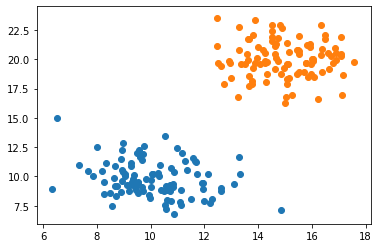

In [729]:
mean00 = [10,10]
mean01 = [15,20]

cov00 = [[2,0],[0,2]]
cov01 = [[2,0],[0,2]]

class00 = np.random.multivariate_normal(mean00, cov00, size=100, check_valid='warn', tol=1e-8)
class01 = np.random.multivariate_normal(mean01, cov01, size=100, check_valid='warn', tol=1e-8)

plt.scatter(class00[:,0],class00[:,1])
plt.scatter(class01[:,0],class01[:,1])

**Generando una sola base de datos de datos clasificados**

In [730]:
zeros = np.zeros(len(class00)).T
labeled_class00 = np.append(class00,np.transpose([zeros]),axis=1)
labeled_class01 = np.append(class01,np.transpose([zeros])+1,axis=1)
labeled_classes = np.append(labeled_class00,labeled_class01,axis=0)
len(labeled_classes)

200

Definimos nuestra función de "costo". Decidimos implementar la derivada de la verosimilitud 

$\frac{\partial LL(\theta)}{\partial \theta_j} = \sum_{i=1}^n [y_i-sigm(\theta^T\mathbf{x}_i)]x_j$

**La programación de la derivada de la función de costo **

In [731]:
#def pd(x,y,a):
#    s = 0    
#    for i in np.arange(len(x)):
#        dif = ((y[i]-a*x[i]))
#        s = s + dif*(x[i])
#    return s

In [732]:
pd = 0


    
    
    



**Utilizando modelo sin Bias**
        
$\mathbf{wx}=0$

In [737]:
bias = 0
n = 0.01
sigm = lambda x: 1/(1 + np.exp(-x))


#inicializar parametros theta

m = len(x)
param = [1,2]

#repetir varias veces
for k in range(1000):
    
    #inicializar gradiente
    g = np.zeros(m)

    #por cada tupla (x,y)
    for v in labeled_classes:
        s = 0
        x = v[:2]
        y = v[2]
        
        # por cada parametro
        for j in np.arange(m):
            line = np.matmul(param,x)
            g[j] += (y-sigm(line))*x[j]
            
    param += n*g



In [738]:
print("w_1,w_2",param)
print("w_0 (bias) = ",bias)

w_1,w_2 [-38.34074401  40.34277142]
w_0 (bias) =  0


In [739]:
# ecuación de la sigmoide sin bias
def f(x):
    return sigm(np.matmul(x,param))
    

pred = (np.array(list(map(f,labeled_classes[:,0:2])))>0.5)*1
print("errores de clasificación: ", np.sum((pred-labeled_classes[:,2])**2))

errores de clasificación:  60.0


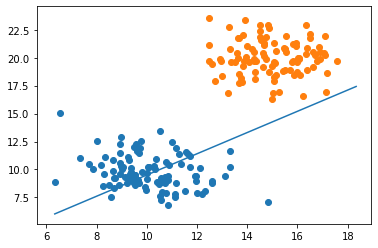

In [740]:
hmin = np.min([class00[:,0],class01[:,0]])
hmax = np.max([class00[:,0],class01[:,0]])+1
X = np.arange(hmin,hmax)


plt.plot(X,(-param[0]/param[1])*X)
plt.scatter(class00[:,0],class00[:,1])
plt.scatter(class01[:,0],class01[:,1])
plt.show()

Ahora considerando: 

**Utilizando modelo con Bias**
        
$\mathbf{wx}_i+w_0=0$

$x_0w_0$ con $x_0 =  1$